In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("C:/Users/91899/Desktop/Machine Hack/Buyer's Time Prediction Challenge/ParticipantData_BTPC/train.csv")
df.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [117]:
test = pd.read_csv("C:/Users/91899/Desktop/Machine Hack/Buyer's Time Prediction Challenge/ParticipantData_BTPC/test.csv")
test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
session_id        5429 non-null object
session_number    5429 non-null int64
client_agent      5269 non-null object
device_details    5429 non-null object
date              5429 non-null object
purchased         5429 non-null int64
added_in_cart     5429 non-null int64
checked_out       5429 non-null int64
time_spent        5429 non-null float64
dtypes: float64(1), int64(4), object(4)
memory usage: 381.9+ KB


In [119]:
df.describe()

,session_number,purchased,added_in_cart,checked_out,time_spent
count,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000
mean,1072.835329,0.159145,0.162092,0.017499,663.194292
std,1436.351474,0.365845,0.368570,0.131132,1713.671664
min,11.000000,0.000000,0.000000,0.000000,14.400000
25%,121.000000,0.000000,0.000000,0.000000,22.699000
50%,517.000000,0.000000,0.000000,0.000000,98.312000
75%,1397.000000,0.000000,0.000000,0.000000,600.463000
max,7722.000000,1.000000,1.000000,1.000000,38494.025000


In [120]:
df['device_details'].value_counts()

iPhone - iOS                  1515
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [121]:
df['purchased'].value_counts()

0    4565
1     864
Name: purchased, dtype: int64

In [122]:
test['device_details'].value_counts()

iPhone - iOS                 615
Desktop - Chrome             366
iPhone - Web                 279
iPhone - MobileWeb           152
Desktop - IE                 137
Desktop - Safari             130
Android Phone - Android      125
iPad - Web                   124
Android Tablet - Web          96
Desktop - Firefox             93
Other - Other                 82
iPad - iOS                    44
Unknown - MobileWeb           35
Android Phone - Web           26
Android Phone - MobileWeb     18
Android Tablet - Android       5
Name: device_details, dtype: int64

In [123]:
df['added_in_cart'].value_counts()

0    4549
1     880
Name: added_in_cart, dtype: int64

In [124]:
df['session_id'].value_counts()

493453c906e2c7ba6a54b857dc1b4149    1
4045b6d72bbd15e669cf6d19a909a841    1
e881712086daf46e4a36ef0c6d0d13cb    1
233fb00159c57d58a28393d98a54603a    1
10baab658ec619668cec9ac9b0466510    1
                                   ..
d879bed3cff833e01d29b2a1da098517    1
a1ad9c394037c1a6217d9ff54c06135a    1
5143e531c3ea9432b0478b324f29c967    1
bc242239cd82cd905f3e6c17b7f6e248    1
54c0ac23f66ff1ce0074af7a0133a1e0    1
Name: session_id, Length: 5429, dtype: int64

In [125]:
df['session_number'].value_counts()

11      437
22      192
33      132
44      101
55       93
       ... 
3949      1
3696      1
5962      1
7601      1
6083      1
Name: session_number, Length: 610, dtype: int64

In [126]:
df['client_agent'].isna().sum()

160

In [127]:
df['client_agent'].fillna(method = 'bfill', inplace = True, limit = 1)
df['client_agent'].fillna(method = 'ffill', inplace = True, limit = 1)
test['client_agent'].fillna(method = 'bfill', inplace = True, limit = 1)
test['client_agent'].fillna(method = 'ffill', inplace = True, limit = 1)

In [128]:
df['client_agent'].isnull().sum()

0

In [129]:
test['client_agent'].isnull().sum()

0

In [103]:
# df['session_number'].isnull().sum()

In [104]:
# df['client_agent'].unique()

In [105]:
df['client_agent'].str[0:8].unique()

array(['Mozilla/', 'Product/', 'Typhoeus', 'Opera/9.', '-unknown',
       'Safari/6', 'Dalvik/2'], dtype=object)

In [106]:
test['client_agent'].str[0:8].unique()

array(['Mozilla/', 'Product/', nan, 'Opera/9.', 'Typhoeus', '-unknown'],
      dtype=object)

In [107]:
#  df['client_agent'].str[0:8].value_counts()

In [130]:
df.corr()

,session_number,purchased,added_in_cart,checked_out,time_spent
session_number,1.000000,-0.213733,0.003013,-0.054500,0.078437
purchased,-0.213733,1.000000,0.045022,0.168513,0.200762
added_in_cart,0.003013,0.045022,1.000000,0.215754,0.209807
checked_out,-0.054500,0.168513,0.215754,1.000000,0.157765
time_spent,0.078437,0.200762,0.209807,0.157765,1.000000


In [131]:
df.skew()

session_number    2.151535
purchased         1.864068
added_in_cart     1.834292
checked_out       7.361734
time_spent        8.037562
dtype: float64

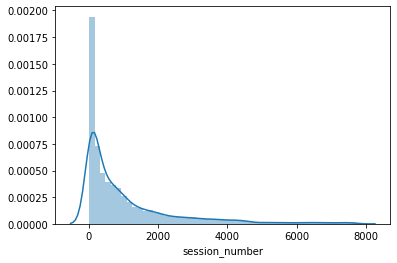

In [132]:
sns.distplot(df['session_number'])
plt.show()

In [133]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["session_id"] = lb.fit_transform(df["session_id"])
test["session_id"] = lb.fit_transform(test["session_id"])

In [134]:
df["client_agent"] = lb.fit_transform(df["client_agent"])
test["client_agent"] = lb.fit_transform(test["client_agent"])

In [135]:
device_detail = df["device_details"]
device_detail = pd.get_dummies(device_detail, drop_first = True)
device_detail.head()

,Android Phone - MobileWeb,Android Phone - Web,Android Tablet - Android,Android Tablet - MobileWeb,Android Tablet - Web,Desktop - Chrome,Desktop - Firefox,Desktop - IE,Desktop - Safari,Other - Other,Unknown - MobileWeb,iPad - Web,iPad - iOS,iPhone - MobileWeb,iPhone - Web,iPhone - iOS
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [136]:
df = pd.concat([df,device_detail], axis = 1)
df = df.drop(['device_details'],axis = 1, inplace = False)
df.head()

,session_id,session_number,client_agent,date,purchased,added_in_cart,checked_out,time_spent,Android Phone - MobileWeb,Android Phone - Web,...,Desktop - Firefox,Desktop - IE,Desktop - Safari,Other - Other,Unknown - MobileWeb,iPad - Web,iPad - iOS,iPhone - MobileWeb,iPhone - Web,iPhone - iOS
0,1912,715,269,2020-01-22,1,0,0,236.886,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3520,55,688,2020-02-27,1,0,0,1277.455,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1063,11,412,2019-08-01,0,0,0,21.704,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5142,2794,355,2019-12-30,0,1,0,455.201,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4858,3674,407,2019-09-10,0,0,0,1164.877,0,0,...,0,0,0,0,0,0,0,0,1,0


In [137]:
device_det = test['device_details']
device_det = pd.get_dummies(device_det, drop_first = True)
device_det.head()

,Android Phone - MobileWeb,Android Phone - Web,Android Tablet - Android,Android Tablet - Web,Desktop - Chrome,Desktop - Firefox,Desktop - IE,Desktop - Safari,Other - Other,Unknown - MobileWeb,iPad - Web,iPad - iOS,iPhone - MobileWeb,iPhone - Web,iPhone - iOS
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [138]:
df_test = pd.concat([test,device_det], axis = 1)
df_test = df_test.drop(['device_details'],axis = 1, inplace = False)
df_test.head()

,session_id,session_number,client_agent,date,purchased,added_in_cart,checked_out,Android Phone - MobileWeb,Android Phone - Web,Android Tablet - Android,...,Desktop - Firefox,Desktop - IE,Desktop - Safari,Other - Other,Unknown - MobileWeb,iPad - Web,iPad - iOS,iPhone - MobileWeb,iPhone - Web,iPhone - iOS
0,106,99,174,2020-01-07,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,950,935,355,2020-02-13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,542,902,418,2019-10-14,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1421,3223,238,2020-01-26,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1993,231,202,2020-01-29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [140]:
df_test['year'] = pd.DatetimeIndex(df_test['date']).year
df_test['month'] = pd.DatetimeIndex(df_test['date']).month
df_test['day'] = pd.DatetimeIndex(df_test['date']).day

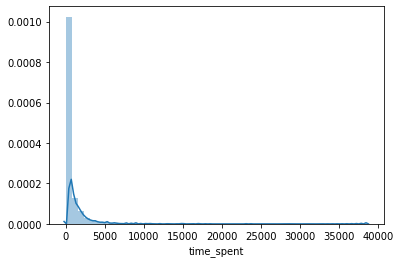

In [141]:
sns.distplot(df['time_spent'])
plt.show()

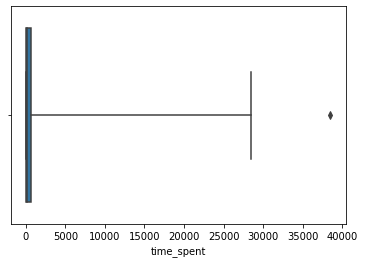

In [142]:
sns.boxplot(df['time_spent'], whis = 50)
plt.show()

In [143]:
q1 = df['time_spent'].quantile(0.25)
q3 = df['time_spent'].quantile(0.75)
IQR = q3 - q1
IQR

577.7640000000002

In [144]:
upper_limit = q3 + 50*IQR
upper_limit

29488.66300000001

In [145]:
lower_limit = q1 - 1.5*IQR
lower_limit

-843.9470000000005

In [146]:
df[df['time_spent'] > upper_limit]

,session_id,session_number,client_agent,date,purchased,added_in_cart,checked_out,time_spent,Android Phone - MobileWeb,Android Phone - Web,...,Other - Other,Unknown - MobileWeb,iPad - Web,iPad - iOS,iPhone - MobileWeb,iPhone - Web,iPhone - iOS,year,month,day
964,4337,5676,611,2019-09-18,0,1,0,38494.025,0,0,...,0,0,0,0,0,0,1,2019,9,18


In [147]:
df.drop(df[df['time_spent'] > upper_limit].index, axis =0, inplace = True)

In [148]:
y = df['time_spent']

In [149]:
X = df.drop([ 'date', 'time_spent'], axis = 1,inplace = False)

In [150]:
X.head()

,session_id,session_number,client_agent,purchased,added_in_cart,checked_out,Android Phone - MobileWeb,Android Phone - Web,Android Tablet - Android,Android Tablet - MobileWeb,...,Other - Other,Unknown - MobileWeb,iPad - Web,iPad - iOS,iPhone - MobileWeb,iPhone - Web,iPhone - iOS,year,month,day
0,1912,715,269,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,1,22
1,3520,55,688,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2020,2,27
2,1063,11,412,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2019,8,1
3,5142,2794,355,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,12,30
4,4858,3674,407,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2019,9,10


In [151]:
df_test['Android Tablet - MobileWeb'] = 0

In [152]:
df_test = df_test.drop([ 'date'], axis = 1,inplace = False)

In [153]:
df_test.head()

,session_id,session_number,client_agent,purchased,added_in_cart,checked_out,Android Phone - MobileWeb,Android Phone - Web,Android Tablet - Android,Android Tablet - Web,...,Unknown - MobileWeb,iPad - Web,iPad - iOS,iPhone - MobileWeb,iPhone - Web,iPhone - iOS,year,month,day,Android Tablet - MobileWeb
0,106,99,174,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2020,1,7,0
1,950,935,355,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2020,2,13,0
2,542,902,418,1,0,0,0,0,0,0,...,0,0,0,0,0,1,2019,10,14,0
3,1421,3223,238,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2020,1,26,0
4,1993,231,202,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2020,1,29,0


In [154]:
from sklearn.preprocessing import PowerTransformer
y = y.values.reshape((len(y),1))
boxci = PowerTransformer(method='yeo-johnson', standardize=True)
y = boxci.fit_transform(y)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [157]:
et = ExtraTreesRegressor(n_jobs=-1,n_estimators=500)
rf = RandomForestRegressor(max_depth=8,bootstrap=True,n_jobs=-1,n_estimators=200,max_features='sqrt')
xgb = xgboost.XGBRegressor(n_jobs=-1,colsample_bytree=0.7, learning_rate=0.07,
                           max_depth=5, min_child_weight=4, n_estimators=500,nthread=4, subsample=0.7)
gbr = GradientBoostingRegressor(random_state=0)
xgb = xgboost.XGBRegressor(n_jobs=-1)
et = ExtraTreesRegressor(n_jobs=-1)
rf = RandomForestRegressor(n_jobs=-1)
ds = DecisionTreeRegressor()
catboost_reg = CatBoostRegressor()

In [158]:
pipelines = {
"LinearRegression": LinearRegression(),
"AdaBoostRegressor":AdaBoostRegressor(random_state=0, n_estimators=100),
"ElasticNet":ElasticNet(random_state=0),
"GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
"DecisionTreeRegressor": DecisionTreeRegressor(),
"ExtraTreesRegressor": ExtraTreesRegressor(n_jobs=-1),
"RandomForestRegressor": RandomForestRegressor(n_jobs=-1),
"XGBRegressor":xgboost.XGBRegressor(n_jobs=-1),
"CatBoostRegressor":CatBoostRegressor(iterations=900, depth=5, learning_rate=0.05,loss_function = 'RMSE')
}

In [159]:
dic =  {"Model":[],"R2_Train":[],"RMSE_Train":[]}
for name, model in pipelines.items():
    if name == 'CatBoostRegressor':
        model.fit(X_train, y_train,verbose=False)
    else:
        model.fit(X_train, y_train)
    #y_test_pre = model.predict(test_df)
    predict_train = model.predict(X_train)
    predict_test  = model.predict(X_test)
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("-----Training Data Evalution-----")
    print("Train Score:",model.score(X_train, y_train))
    print("Test Score:",model.score(X_test, y_test))
    print('RMSE on train data: ', np.sqrt(metrics.mean_squared_error(y_train, predict_train)))
    print('RMSE on test data: ',  np.sqrt(metrics.mean_squared_error(y_test, predict_test)))
    dic["Model"].append(name)

--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evalution-----
Train Score: 0.35241737215595015
Test Score: 0.40661776352457757
RMSE on train data:  0.8036867514414713
RMSE on test data:  0.7740212544422155


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evalution-----
Train Score: 0.28997172660653614
Test Score: 0.3274277175790955
RMSE on train data:  0.8415444024603546
RMSE on test data:  0.8240529124906293
--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evalution-----
Train Score: 0.013190598644242768
Test Score: 0.014193405123153369
RMSE on train data:  0.9921009224848516
RMSE on test data:  0.9976575086125095


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------------------------------------------------------------
Model: GradientBoostingRegressor
-----Training Data Evalution-----
Train Score: 0.44875075673018494
Test Score: 0.459618844063132
RMSE on train data:  0.7415035206871988
RMSE on test data:  0.7386449175798573
--------------------------------------------------------------
Model: DecisionTreeRegressor
-----Training Data Evalution-----
Train Score: 0.9999999997173261
Test Score: -0.07509433545364574
RMSE on train data:  1.679121246636249e-05
RMSE on test data:  1.0418588921269916


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


--------------------------------------------------------------
Model: ExtraTreesRegressor
-----Training Data Evalution-----
Train Score: 0.9999999999854928
Test Score: 0.3495085052140424
RMSE on train data:  3.803918833112039e-06
RMSE on test data:  0.8104130525404902


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


--------------------------------------------------------------
Model: RandomForestRegressor
-----Training Data Evalution-----
Train Score: 0.8774292795065434
Test Score: 0.3878532273537385
RMSE on train data:  0.3496492361038184
RMSE on test data:  0.7861644439600945
--------------------------------------------------------------
Model: XGBRegressor
-----Training Data Evalution-----
Train Score: 0.8266022775129231
Test Score: 0.4101016835374589
RMSE on train data:  0.4158731756405108
RMSE on test data:  0.771745657189941
--------------------------------------------------------------
Model: CatBoostRegressor
-----Training Data Evalution-----
Train Score: -6317.252019813012
Test Score: -1570.722955617457
RMSE on train data:  0.6378837978724472
RMSE on test data:  0.7284706163019898


In [48]:
reg_rf = RandomForestRegressor(n_estimators=100)
reg_rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
y_pred = reg_rf.predict(X_test)
print(reg_rf.score(X_train, y_train))
print(reg_rf.score(X_test, y_test))

0.9088582055506899
0.43767971273160833


In [50]:
predict_train = reg_rf.predict(X_train)
predict_test  = reg_rf.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('RMSE on train data: ', np.sqrt(metrics.mean_squared_error(y_train, predict_train)))
print('RMSE on test data: ',  np.sqrt(metrics.mean_squared_error(y_test, predict_test)))

RMSE on train data:  0.30150741812012555
RMSE on test data:  0.7534899984141943


In [52]:
xgboost_red = xgboost.XGBRegressor(n_jobs=-1)
xgboost_red.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [53]:
y_pred = xgboost_red.predict(X_test)

In [54]:
xgboost_red.score(X_train, y_train)

0.8101256242012271

In [55]:
xgboost_red.score(X_test, y_test)

0.40905199351422117

In [56]:
predict_train = xgboost_red.predict(X_train)
predict_test  = xgboost_red.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('RMSE on train data: ', np.sqrt(metrics.mean_squared_error(y_train, predict_train)))
print('RMSE on test data: ',  np.sqrt(metrics.mean_squared_error(y_test, predict_test)))

RMSE on train data:  0.43518347308094735
RMSE on test data:  0.772431990440735


In [58]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y_pred = linear_reg.predict(X_test)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))

0.3512257368801388
0.4080496895361937


In [60]:
predict_train = linear_reg.predict(X_train)
predict_test  = linear_reg.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('RMSE on train data: ', np.sqrt(metrics.mean_squared_error(y_train, predict_train)))
print('RMSE on test data: ',  np.sqrt(metrics.mean_squared_error(y_test, predict_test)))

RMSE on train data:  0.8044258550507967
RMSE on test data:  0.773086771946257


In [62]:
from catboost import CatBoostRegressor
catboost_reg = CatBoostRegressor()
catboost_reg.fit(X_train, y_train)

Learning rate set to 0.050689
0:	learn: 0.9831285	total: 56ms	remaining: 56s
1:	learn: 0.9689602	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9565678	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9443406	total: 64.4ms	remaining: 16s
4:	learn: 0.9338067	total: 65.9ms	remaining: 13.1s
5:	learn: 0.9242031	total: 67.5ms	remaining: 11.2s
6:	learn: 0.9155076	total: 69.2ms	remaining: 9.82s
7:	learn: 0.9069533	total: 71.9ms	remaining: 8.91s
8:	learn: 0.8990020	total: 74.4ms	remaining: 8.19s
9:	learn: 0.8915711	total: 77ms	remaining: 7.62s
10:	learn: 0.8833599	total: 80ms	remaining: 7.19s
11:	learn: 0.8778381	total: 81.4ms	remaining: 6.71s
12:	learn: 0.8714864	total: 84ms	remaining: 6.37s
13:	learn: 0.8650399	total: 86.6ms	remaining: 6.1s
14:	learn: 0.8606048	total: 88.6ms	remaining: 5.82s
15:	learn: 0.8563621	total: 90.3ms	remaining: 5.55s
16:	learn: 0.8525624	total: 92.8ms	remaining: 5.37s
17:	learn: 0.8475726	total: 95.6ms	remaining: 5.21s
18:	learn: 0.8435196	total: 98.2ms	remaining: 5.07s
19:	l

183:	learn: 0.7429582	total: 504ms	remaining: 2.24s
184:	learn: 0.7426987	total: 507ms	remaining: 2.23s
185:	learn: 0.7424593	total: 510ms	remaining: 2.23s
186:	learn: 0.7422018	total: 513ms	remaining: 2.23s
187:	learn: 0.7419337	total: 515ms	remaining: 2.23s
188:	learn: 0.7415017	total: 518ms	remaining: 2.22s
189:	learn: 0.7411465	total: 521ms	remaining: 2.22s
190:	learn: 0.7409339	total: 523ms	remaining: 2.22s
191:	learn: 0.7406788	total: 526ms	remaining: 2.21s
192:	learn: 0.7403930	total: 528ms	remaining: 2.21s
193:	learn: 0.7400595	total: 531ms	remaining: 2.21s
194:	learn: 0.7397993	total: 533ms	remaining: 2.2s
195:	learn: 0.7394394	total: 536ms	remaining: 2.2s
196:	learn: 0.7391715	total: 538ms	remaining: 2.19s
197:	learn: 0.7389020	total: 541ms	remaining: 2.19s
198:	learn: 0.7386624	total: 543ms	remaining: 2.19s
199:	learn: 0.7383493	total: 546ms	remaining: 2.18s
200:	learn: 0.7380656	total: 548ms	remaining: 2.18s
201:	learn: 0.7377180	total: 550ms	remaining: 2.17s
202:	learn: 0.

357:	learn: 0.6979996	total: 990ms	remaining: 1.77s
358:	learn: 0.6978028	total: 992ms	remaining: 1.77s
359:	learn: 0.6975853	total: 995ms	remaining: 1.77s
360:	learn: 0.6973824	total: 998ms	remaining: 1.76s
361:	learn: 0.6972772	total: 1s	remaining: 1.76s
362:	learn: 0.6971395	total: 1s	remaining: 1.76s
363:	learn: 0.6968791	total: 1s	remaining: 1.76s
364:	learn: 0.6967020	total: 1.01s	remaining: 1.75s
365:	learn: 0.6965108	total: 1.01s	remaining: 1.75s
366:	learn: 0.6963068	total: 1.01s	remaining: 1.75s
367:	learn: 0.6960473	total: 1.02s	remaining: 1.75s
368:	learn: 0.6959547	total: 1.02s	remaining: 1.75s
369:	learn: 0.6957430	total: 1.03s	remaining: 1.75s
370:	learn: 0.6955333	total: 1.03s	remaining: 1.75s
371:	learn: 0.6953739	total: 1.03s	remaining: 1.74s
372:	learn: 0.6951529	total: 1.03s	remaining: 1.74s
373:	learn: 0.6949300	total: 1.04s	remaining: 1.74s
374:	learn: 0.6946706	total: 1.04s	remaining: 1.73s
375:	learn: 0.6943869	total: 1.04s	remaining: 1.73s
376:	learn: 0.6942238

519:	learn: 0.6680344	total: 1.47s	remaining: 1.36s
520:	learn: 0.6678325	total: 1.48s	remaining: 1.36s
521:	learn: 0.6676429	total: 1.48s	remaining: 1.35s
522:	learn: 0.6674863	total: 1.48s	remaining: 1.35s
523:	learn: 0.6672772	total: 1.48s	remaining: 1.35s
524:	learn: 0.6670980	total: 1.49s	remaining: 1.34s
525:	learn: 0.6669537	total: 1.49s	remaining: 1.34s
526:	learn: 0.6667865	total: 1.49s	remaining: 1.34s
527:	learn: 0.6666463	total: 1.49s	remaining: 1.33s
528:	learn: 0.6665458	total: 1.5s	remaining: 1.33s
529:	learn: 0.6664056	total: 1.5s	remaining: 1.33s
530:	learn: 0.6662145	total: 1.5s	remaining: 1.33s
531:	learn: 0.6660257	total: 1.51s	remaining: 1.32s
532:	learn: 0.6658820	total: 1.51s	remaining: 1.32s
533:	learn: 0.6656662	total: 1.51s	remaining: 1.32s
534:	learn: 0.6654615	total: 1.51s	remaining: 1.31s
535:	learn: 0.6652860	total: 1.51s	remaining: 1.31s
536:	learn: 0.6651305	total: 1.52s	remaining: 1.31s
537:	learn: 0.6649729	total: 1.52s	remaining: 1.31s
538:	learn: 0.6

691:	learn: 0.6417174	total: 1.96s	remaining: 873ms
692:	learn: 0.6415258	total: 1.96s	remaining: 870ms
693:	learn: 0.6414519	total: 1.97s	remaining: 867ms
694:	learn: 0.6412780	total: 1.97s	remaining: 865ms
695:	learn: 0.6412159	total: 1.97s	remaining: 862ms
696:	learn: 0.6410799	total: 1.98s	remaining: 859ms
697:	learn: 0.6409583	total: 1.98s	remaining: 856ms
698:	learn: 0.6407944	total: 1.98s	remaining: 854ms
699:	learn: 0.6406696	total: 1.98s	remaining: 851ms
700:	learn: 0.6404736	total: 1.99s	remaining: 848ms
701:	learn: 0.6403501	total: 1.99s	remaining: 845ms
702:	learn: 0.6401461	total: 1.99s	remaining: 842ms
703:	learn: 0.6400661	total: 2s	remaining: 839ms
704:	learn: 0.6399346	total: 2s	remaining: 836ms
705:	learn: 0.6398070	total: 2s	remaining: 833ms
706:	learn: 0.6397063	total: 2s	remaining: 830ms
707:	learn: 0.6396408	total: 2s	remaining: 827ms
708:	learn: 0.6395668	total: 2.01s	remaining: 824ms
709:	learn: 0.6393975	total: 2.01s	remaining: 821ms
710:	learn: 0.6392581	total

887:	learn: 0.6151094	total: 2.46s	remaining: 310ms
888:	learn: 0.6149291	total: 2.46s	remaining: 307ms
889:	learn: 0.6148094	total: 2.46s	remaining: 304ms
890:	learn: 0.6147277	total: 2.46s	remaining: 302ms
891:	learn: 0.6146767	total: 2.47s	remaining: 299ms
892:	learn: 0.6144864	total: 2.47s	remaining: 296ms
893:	learn: 0.6144158	total: 2.47s	remaining: 293ms
894:	learn: 0.6143185	total: 2.48s	remaining: 290ms
895:	learn: 0.6142071	total: 2.48s	remaining: 288ms
896:	learn: 0.6140406	total: 2.48s	remaining: 285ms
897:	learn: 0.6139268	total: 2.48s	remaining: 282ms
898:	learn: 0.6137590	total: 2.49s	remaining: 280ms
899:	learn: 0.6135577	total: 2.49s	remaining: 277ms
900:	learn: 0.6134007	total: 2.49s	remaining: 274ms
901:	learn: 0.6132913	total: 2.5s	remaining: 271ms
902:	learn: 0.6132190	total: 2.5s	remaining: 268ms
903:	learn: 0.6130543	total: 2.5s	remaining: 266ms
904:	learn: 0.6128962	total: 2.5s	remaining: 263ms
905:	learn: 0.6127868	total: 2.51s	remaining: 260ms
906:	learn: 0.61

In [63]:
y_pred = catboost_reg.predict(X_test)
print(catboost_reg.score(X_train, y_train))
print(catboost_reg.score(X_test, y_test))

-6385.513629808638
-1572.008105659888


In [64]:
predict_train = catboost_reg.predict(X_train)
predict_test  = catboost_reg.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('RMSE on train data: ', np.sqrt(metrics.mean_squared_error(y_train, predict_train)))
print('RMSE on test data: ',  np.sqrt(metrics.mean_squared_error(y_test, predict_test)))

RMSE on train data:  0.6016585352441411
RMSE on test data:  0.7385167911147609


In [160]:
%%time

model = VotingRegressor([('gbr', gbr),('catboost_reg',catboost_reg)],n_jobs=-1)

model.fit(X_train, y_train)

Wall time: 6.56 s


VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                  

In [161]:
y_pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5715160174544265
0.47600249317258664


In [162]:
predict_train = model.predict(X_train)
predict_test  = model.predict(X_test)

In [163]:
print('RMSE on train data: ', np.sqrt(metrics.mean_squared_error(y_train, predict_train)))
print('RMSE on test data: ',  np.sqrt(metrics.mean_squared_error(y_test, predict_test)))

RMSE on train data:  0.6537421849684991
RMSE on test data:  0.7273613602501299


### HyperParameter tuning

In [164]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in extra tree
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 8)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4, 5, 10]

In [165]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [166]:
gbr = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [167]:
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   0.5s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   2.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   2.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   2.7s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   2.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   2.4s
[CV] n_estimators=311, min_samples_split=3, min_samples_leaf=3, max_features=auto, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=311, min_samples_split=3, min_samples_leaf=3, max_features=auto, max_depth=25, total=  11.3s
[CV] n_estimators=311, min_samples_split=3, min_samples_leaf=3, max_features=auto, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=311, min_samples_split=3, min_samples_leaf=3, max_features=auto, max_depth=25, total=  11.3s
[CV] n_estimators=311, min_samples_split=3, min_samples_leaf=3, max_features=auto, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=311, min_samples_split=3, min_samples_leaf=3, max_features=auto, max_depth=25, total=  11.1s
[CV] n_estimators=311, min_samples_split=3, min_samples_leaf=3, max_features=auto, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=311, min_samples_split=3, min_samples_leaf=3, max_features=auto, max_depth=25, total=  11.2s
[CV] n_estimators=311, min_samples_split=3, min_samples_leaf=3, max_features=auto, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=311, min_samples_split=3, min_samples_leaf=3, max_features=auto, max_depth=25, total=  11.1s
[CV] n_estimators=944, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=944, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   4.7s
[CV] n_estimators=944, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=944, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   4.8s
[CV] n_estimators=944, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=944, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   4.8s
[CV] n_estimators=944, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=944, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   4.8s
[CV] n_estimators=944, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=944, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   4.8s
[CV] n_estimators=1155, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1155, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=25, total=   6.1s
[CV] n_estimators=1155, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1155, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=25, total=   6.2s
[CV] n_estimators=1155, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1155, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=25, total=   6.3s
[CV] n_estimators=1155, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1155, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=25, total=   6.2s
[CV] n_estimators=1155, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1155, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=25, total=   6.3s
[CV] n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=1366, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=20 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1366, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   6.6s
[CV] n_estimators=1366, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=20 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1366, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   6.7s
[CV] n_estimators=1366, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=20 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1366, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   6.9s
[CV] n_estimators=1366, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=20 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1366, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   6.7s
[CV] n_estimators=1366, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=20 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1366, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   6.8s
[CV] n_estimators=1788, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1788, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   4.6s
[CV] n_estimators=1788, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1788, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   4.8s
[CV] n_estimators=1788, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1788, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   4.7s
[CV] n_estimators=1788, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1788, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   4.6s
[CV] n_estimators=1788, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=1788, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   4.8s
[CV] n_estimators=522, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=35 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=522, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=35, total=   2.6s
[CV] n_estimators=522, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=35 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=522, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=35, total=   2.8s
[CV] n_estimators=522, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=35 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=522, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=35, total=   2.6s
[CV] n_estimators=522, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=35 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=522, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=35, total=   2.8s
[CV] n_estimators=522, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=35 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  n_estimators=522, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=35, total=   2.6s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [168]:
gbr.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 5}

In [169]:
prediction = gbr.predict(X_test)
prediction

array([-0.72372099,  0.05909067, -0.5758031 , ..., -0.4990399 ,
       -0.19374621, -0.21590543])

In [170]:
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))
predict_train = gbr.predict(X_train)
predict_test  = gbr.predict(X_test)
print('RMSE on train data: ', np.sqrt(metrics.mean_squared_error(y_train, predict_train)))
print('RMSE on test data: ',  np.sqrt(metrics.mean_squared_error(y_test, predict_test)))

-0.4813564237361616
-0.5277032643995238
RMSE on train data:  0.6937985469400766
RMSE on test data:  0.726431871822488


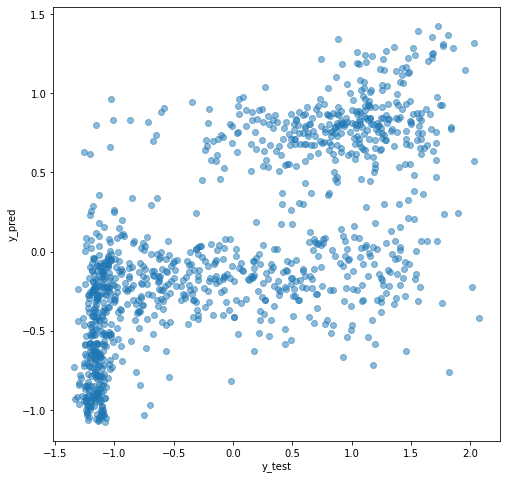

In [95]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [171]:
import pickle
# open a file, where you ant to store the data
file = open('gbr.pkl', 'wb')

# dump information to that file
pickle.dump(gbr, file)

In [172]:
result = gbr.predict(df_test)

In [173]:
result

array([ 0.96290592, -0.18204252, -0.10573848, ..., -0.18831953,
        0.5831654 ,  0.59901489])

In [174]:
results = pd.DataFrame(data=result)
results.head()

,0
0,0.962906
1,-0.182043
2,-0.105738
3,0.264096
4,0.343434


In [175]:
a_inverse_transformed = boxci.inverse_transform(results)
a_inverse_transformed

array([[648.53558908],
       [ 77.23986321],
       [ 86.93129307],
       ...,
       [ 76.50099956],
       [289.89526693],
       [299.08901757]])

In [176]:
res = pd.DataFrame(data=a_inverse_transformed, columns={'time_spent': '0'}).round(2)
res.head()

,time_spent
0,648.54
1,77.24
2,86.93
3,160.39
4,184.69


In [177]:
res.to_csv("Submission.csv", index=False)